<a href="https://colab.research.google.com/github/kellyellyz/Final_DataProject/blob/main/final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Predication EDA Notebook

## Intro to Problem and Data

### Problem Statement:

I have always been very concerned about students' mental health, especially in the current situation of increasing academic pressure, lifestyle imbalance and emotional distress. My project aims to explore the possibility of depression based on students' daily life data (such as sleep time, stress, study habits and family history).

I believe that the ability to accurately predict depression risk can be a powerful tool for early intervention, allowing institutions to more effectively allocate mental health resources. Stakeholders such as educators, counselors, and public health organizations can benefit from these insights to design targeted wellness programs and policy responses. Overall, this model supports data-driven strategies to foster healthier learning environments and improve student outcomes.

**The main problem is: Can we predict whether a student is experiencing depression based on their lifestyle, academic pressure, and mental health indicators?**

### Dataset Description

The data for this project is sourced from a survey dataset containing detailed information about student demographics, academic workload, mental health indicators, and lifestyle habits. It includes multiple columns that reflect aspects such as sleep duration, dietary habits, CGPA, and study satisfaction. The survey was conducted in India.

Predicting mental health outcomes like depression poses challenges due to the subjective and multifaceted nature of the condition. However, this dataset offers a diverse set of features that may act as strong predictors. By analyzing how lifestyle, academic pressure, and emotional factors interact, I aim to uncover meaningful patterns that can support early detection efforts.

The dataset comprises several hundred individual responses, with over 15 columns and 27901 rows capturing both numerical and categorical information. These features can be engineered and modeled to build a classification system that predicts whether a student is at risk for depression, supporting proactive strategies in student mental health.

##Exploratory Data Analysis

### Data Pre-Processing & Preliminary Examination:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#load dataset
depression_data = '/content/depression.csv'
df = pd.read_csv(depression_data)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Sleep Duration                         27901 non-null  object 
 9   Dietary Habits                         27901 non-null  object 
 10  Degree                                 27901 non-null  object 
 11  Ha

As you can see there's no missing values. So we can proceed EDA as continue.

In [ ]:
#Drop "ID" Column
df.drop(columns=['id'], inplace=True)

### Descriptive Statistics

### Initial exploring some basics

In [ ]:
#Mean CGPA
df['CGPA'].mean()
print(f"Mean CGPA: {df['CGPA'].mean():.2f}")

Mean CGPA: 7.66


In Indian educational institutions, CGPA (Cumulative Grade Point Average) is a common grading system that represents a student's overall academic performance. It is a numerical value, often on a 10-point scale, used to determine a student's academic standing.

In [ ]:
#Median Financial Stress
median_fiancial = df['Financial Stress'].median()
print(f"Median Financial Stress: {median_fiancial}")
mean_fiancial = df['Financial Stress'].mean()
print(f"Mean Financial Stress: {mean_fiancial:.2f}")

Median Financial Stress: 3.0
Mean Financial Stress: 3.14


The survey conducted for financial stress in a scale of 0 to 5.

In [ ]:
#Median Academic Pressure
median_academic = df['Academic Pressure'].median()
mean_academic = df['Academic Pressure'].mean()
print(f"Median Academic Pressure: {median_academic}")
print(f"Mean Academic Pressure: {mean_academic:.2f}")

Median Academic Pressure: 3.0
Mean Academic Pressure: 3.14


The survey conducted for "Academic Pressure" in a scale of 0 to 5.

In [ ]:
#Median Study Satisfaction
median_study_satisfaction = df['Study Satisfaction'].median()
print(f"Median Study Satisfaction: {median_study_satisfaction}")
mean_study_satisfaction = df['Study Satisfaction'].mean()
print(f"Mean Study Satisfaction: {mean_study_satisfaction:.2f}")

Median Study Satisfaction: 3.0
Mean Study Satisfaction: 2.94


The survey conducted for "Study Satisfaction" in a scale of 0 to 5.

**Overall, the data above shows either the mean or median of different types of stress is very standarad (not weird). We can further using box plot or histogram to see if they're skewed or some extreme cases.**

### Inital Visulization to check extremes

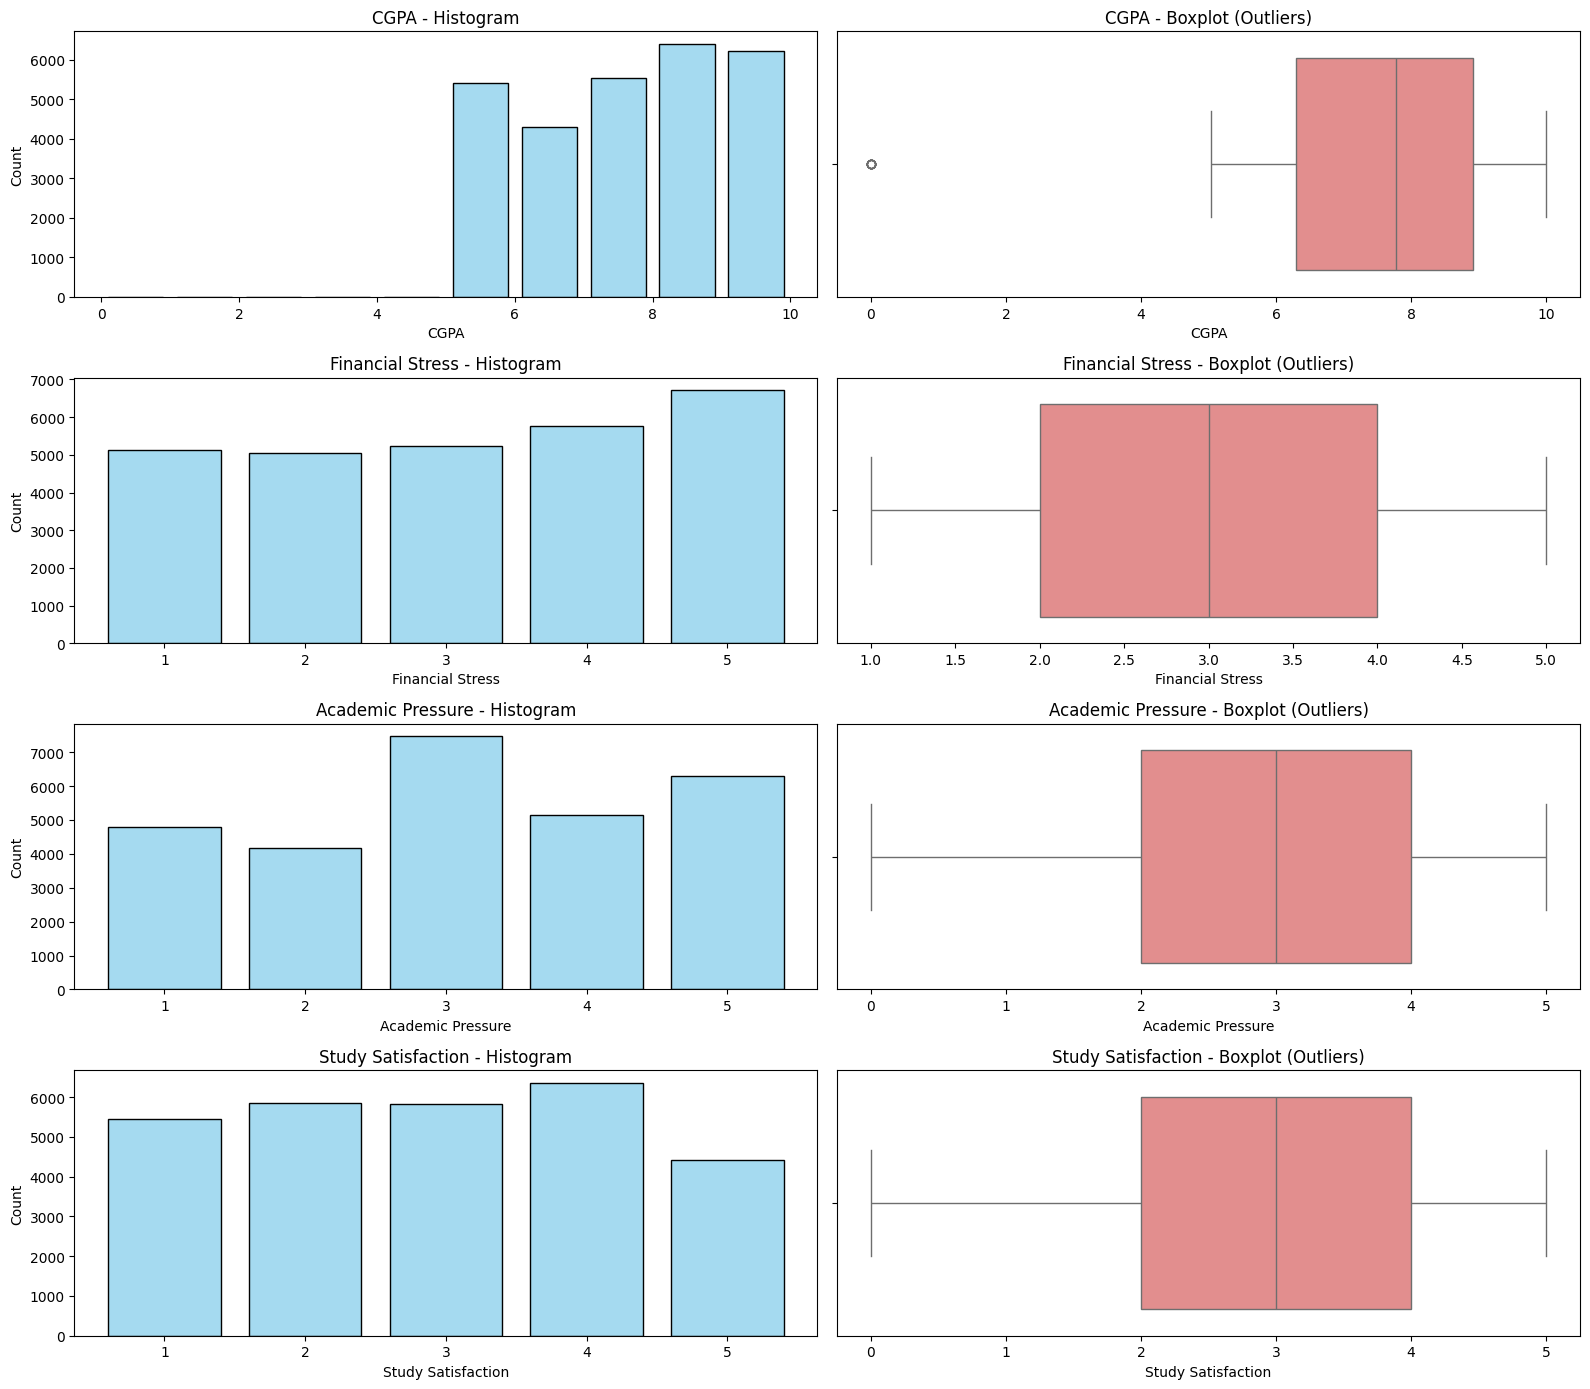

In [ ]:
#Columns to check
cols = ['CGPA', 'Financial Stress', 'Academic Pressure', 'Study Satisfaction']

#Define bins for discrete variables (except CGPA)
bin_map = {
    'CGPA': 10,  # Let seaborn auto-bin CGPA
    'Financial Stress': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    'Academic Pressure': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    'Study Satisfaction': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
}

#Plotting
plt.figure(figsize=(16, 14))

for i, col in enumerate(cols):
    #Histogram
    plt.subplot(len(cols), 2, 2*i + 1)
    bins = bin_map[col]
    sns.histplot(df[col], bins=bins, color='skyblue', shrink=0.8)
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Count')

    #Boxplot
    plt.subplot(len(cols), 2, 2*i + 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'{col} - Boxplot (Outliers)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


From these graphs, there aren't many outliers except the there's one for CGPA. I could consider the drop it but for now I'd keep it because I think it's authentic to consider there are some conditions that are out of our expectations and I would want my models to put this pattern into the consideration.

### Exploring categorical data:

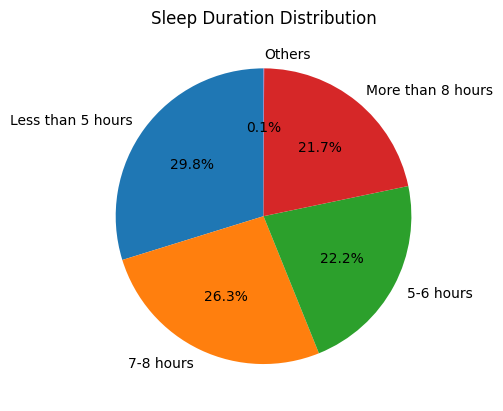

In [ ]:
#Pie Chart – Sleep Duration
df['Sleep Duration'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sleep Duration Distribution')
plt.ylabel('')
plt.show()

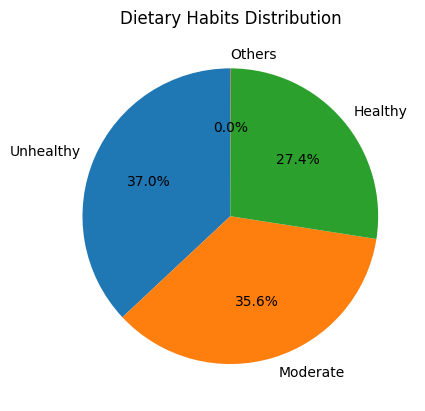

In [ ]:
#Pie Chart – Dietary Habits
df['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Dietary Habits Distribution')
plt.ylabel('')
plt.show()

From these 2 graphs above, distributions are quite evenly spread out except the others, showing it is a good dataset for further explore.

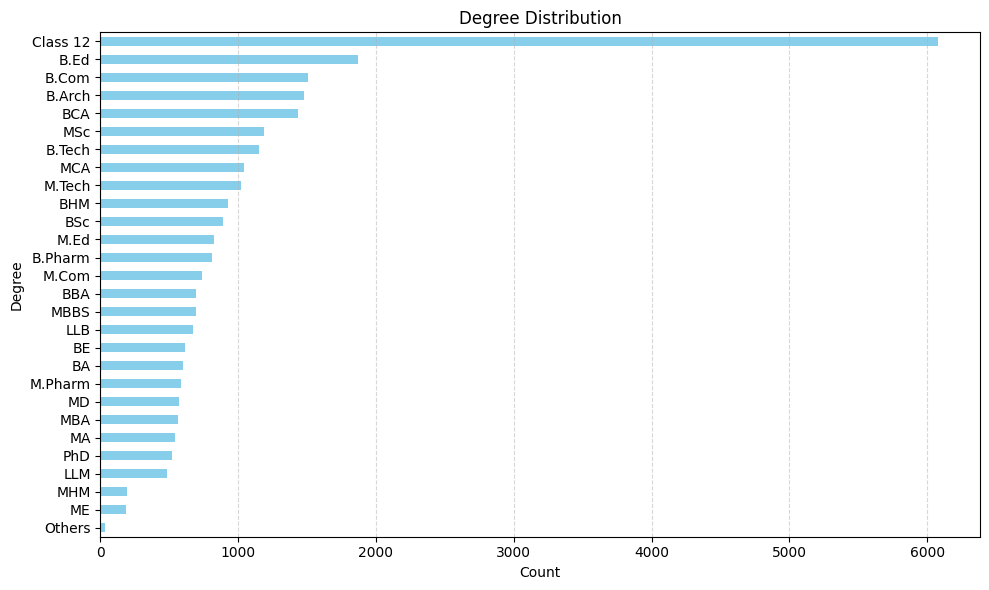

In [ ]:
#Bar chart -- Degree distribution
plt.figure(figsize=(10, 6))
df['Degree'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Degree Distribution')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This shows me that most of the participants are from education level in high school, which means the survey might be biased if you use this model to predict mainly for college students or PHD students.

### More Visulizations: Relationship with Depression

Text(0.5, 1.0, 'Correlation Matrix')

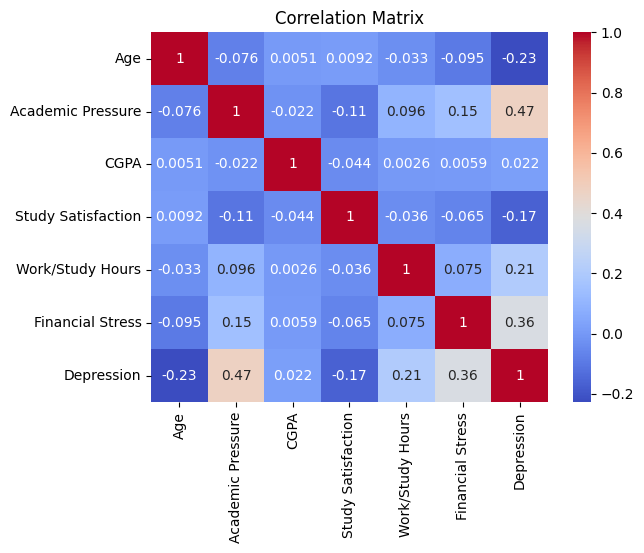

In [ ]:
#Only for numerical columns
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

The scatterplot shows the strongest predictors of depression in this dataset are Academic Pressure and Financial Stress.

Text(0.5, 1.0, 'Age vs Depression')

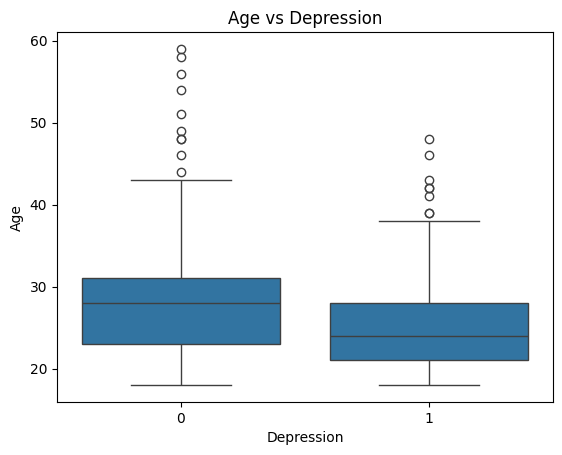

In [ ]:
#Age vs Depression
sns.boxplot(data=df, x='Depression', y='Age')
plt.title('Age vs Depression')

These 2 box plots shows participants in the younger range tend to have higher likelihood to get depression. Thus, age might also be a good indicator.

Text(0.5, 1.0, 'Sleep Duration vs Depression')

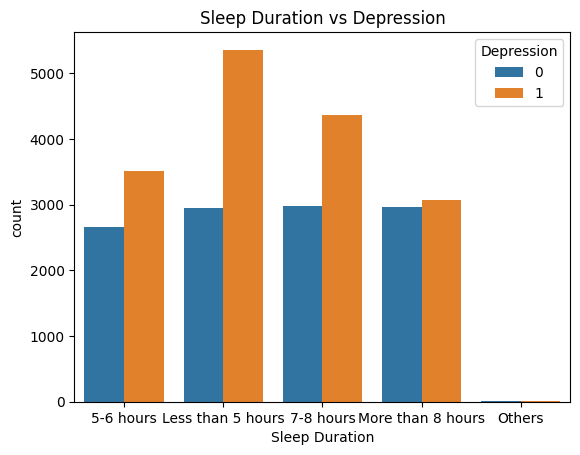

In [ ]:
#Sleep Duration vs Depression
sns.countplot(data=df, x='Sleep Duration', hue='Depression')
plt.title('Sleep Duration vs Depression')

The graphs shows people who have sleep less than 5 hours tend to get depression. On the other hand, there's almost equal amount of people who have or no depression when they get more than 8 hours sleep. Thus, sleep duration could be one of the feature as well to put it in my model.

Text(0.5, 1.0, 'Dietary Habits vs Depression')

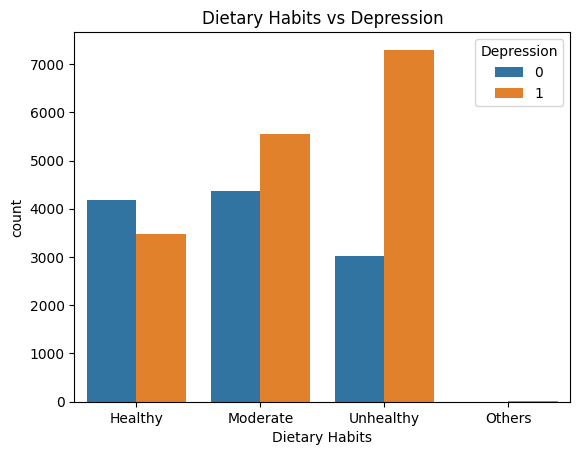

In [ ]:
#Dietary Habits vs Depression
sns.countplot(data=df, x='Dietary Habits', hue='Depression')
plt.title('Dietary Habits vs Depression')

This graph shows when people have unhealthy diet they tend to have high likelihood of depression while people have healthy diet tend to have no depression.

Text(0.5, 1.0, 'Study Satisfaction vs Depression')

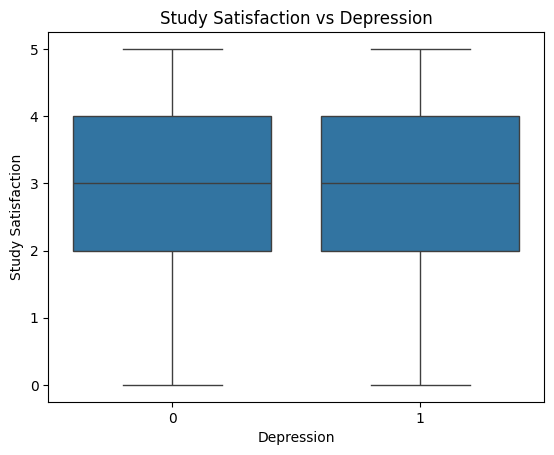

In [ ]:
#Study Satisfaction vs Depression
sns.boxplot(data=df, x='Depression', y='Study Satisfaction')
plt.title('Study Satisfaction vs Depression')

This boxplot shows that study satisfaction levels are very similar between students with and without depression, suggesting no strong visual difference in this feature across the two groups.

In [ ]:
#For 2 special features like: Suicidal Thoughts and Family History of Mental Illness

# Rename columns to simpler names
df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts',
    'Family History of Mental Illness': 'FamilyHistory'
}, inplace=True)

# Convert "Yes"/"No" to 1/0
df['SuicidalThoughts'] = df['SuicidalThoughts'].map({'Yes': 1, 'No': 0})
df['FamilyHistory'] = df['FamilyHistory'].map({'Yes': 1, 'No': 0})

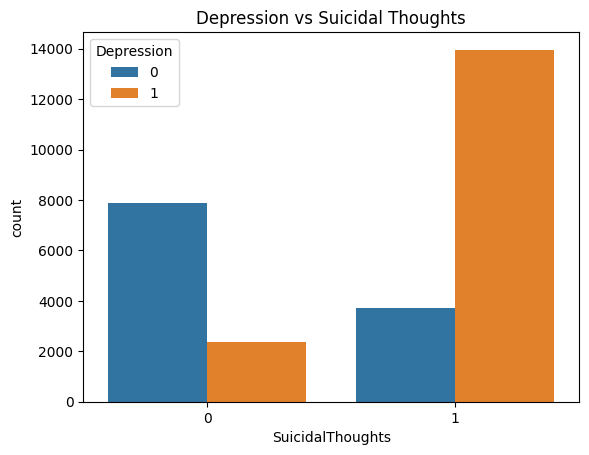

In [ ]:
#Plot
# Suicidal Thoughts vs Depression
sns.countplot(data=df, x='SuicidalThoughts', hue='Depression')
plt.title('Depression vs Suicidal Thoughts')
plt.show()

This indicates when student have suicidal thoughts there're higher possibility for getting depression.

It is clear that suicidal Thoughts seperate people into 2 groups, so I think decision tree might be a good try besides logistics and KNN models.

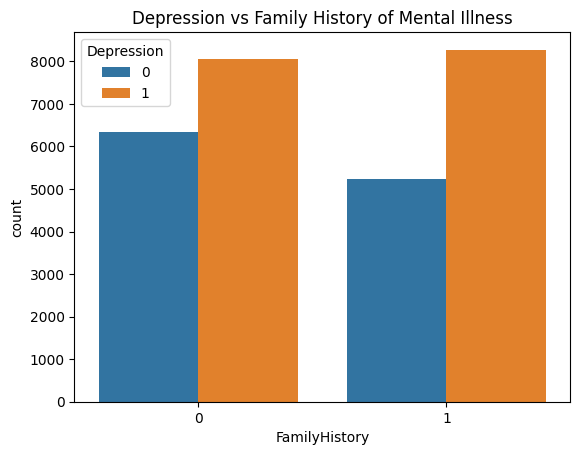

In [ ]:
#Family History vs Depression
sns.countplot(data=df, x='FamilyHistory', hue='Depression')
plt.title('Depression vs Family History of Mental Illness')
plt.show()

This graph doesn't show much of the relationship that if you're famility has hisotrry of depression, there's no direct correlation that you'll have depression.